In [374]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Reading the train data

In [375]:
#Read csv file and convert into Dataframe
data_train=pd.read_csv(r'D:\DataTrained\Flip Robo Technology Internship\Project-Housing_splitted\train.csv')
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [376]:
#shape of file
data_train.shape

(1168, 81)

In [377]:
#Lets see the columns present in the dataset
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [378]:
# Checking for data types of the columns
for column in data_train:
    print(column,"----------------",data_train[column].dtypes)

Id ---------------- int64
MSSubClass ---------------- int64
MSZoning ---------------- object
LotFrontage ---------------- float64
LotArea ---------------- int64
Street ---------------- object
Alley ---------------- object
LotShape ---------------- object
LandContour ---------------- object
Utilities ---------------- object
LotConfig ---------------- object
LandSlope ---------------- object
Neighborhood ---------------- object
Condition1 ---------------- object
Condition2 ---------------- object
BldgType ---------------- object
HouseStyle ---------------- object
OverallQual ---------------- int64
OverallCond ---------------- int64
YearBuilt ---------------- int64
YearRemodAdd ---------------- int64
RoofStyle ---------------- object
RoofMatl ---------------- object
Exterior1st ---------------- object
Exterior2nd ---------------- object
MasVnrType ---------------- object
MasVnrArea ---------------- float64
ExterQual ---------------- object
ExterCond ---------------- object
Foundation ----

In [379]:
# Checking for null values
for column in data_train:
    print(column,"----------------",data_train[column].isnull().sum())

Id ---------------- 0
MSSubClass ---------------- 0
MSZoning ---------------- 0
LotFrontage ---------------- 214
LotArea ---------------- 0
Street ---------------- 0
Alley ---------------- 1091
LotShape ---------------- 0
LandContour ---------------- 0
Utilities ---------------- 0
LotConfig ---------------- 0
LandSlope ---------------- 0
Neighborhood ---------------- 0
Condition1 ---------------- 0
Condition2 ---------------- 0
BldgType ---------------- 0
HouseStyle ---------------- 0
OverallQual ---------------- 0
OverallCond ---------------- 0
YearBuilt ---------------- 0
YearRemodAdd ---------------- 0
RoofStyle ---------------- 0
RoofMatl ---------------- 0
Exterior1st ---------------- 0
Exterior2nd ---------------- 0
MasVnrType ---------------- 7
MasVnrArea ---------------- 7
ExterQual ---------------- 0
ExterCond ---------------- 0
Foundation ---------------- 0
BsmtQual ---------------- 30
BsmtCond ---------------- 30
BsmtExposure ---------------- 31
BsmtFinType1 ----------------

# Visualization of the Data, Encoding object data and filling the null values

127     1
1391    1
1389    1
448     1
1179    1
       ..
1402    1
661     1
101     1
415     1
617     1
Name: Id, Length: 1168, dtype: int64


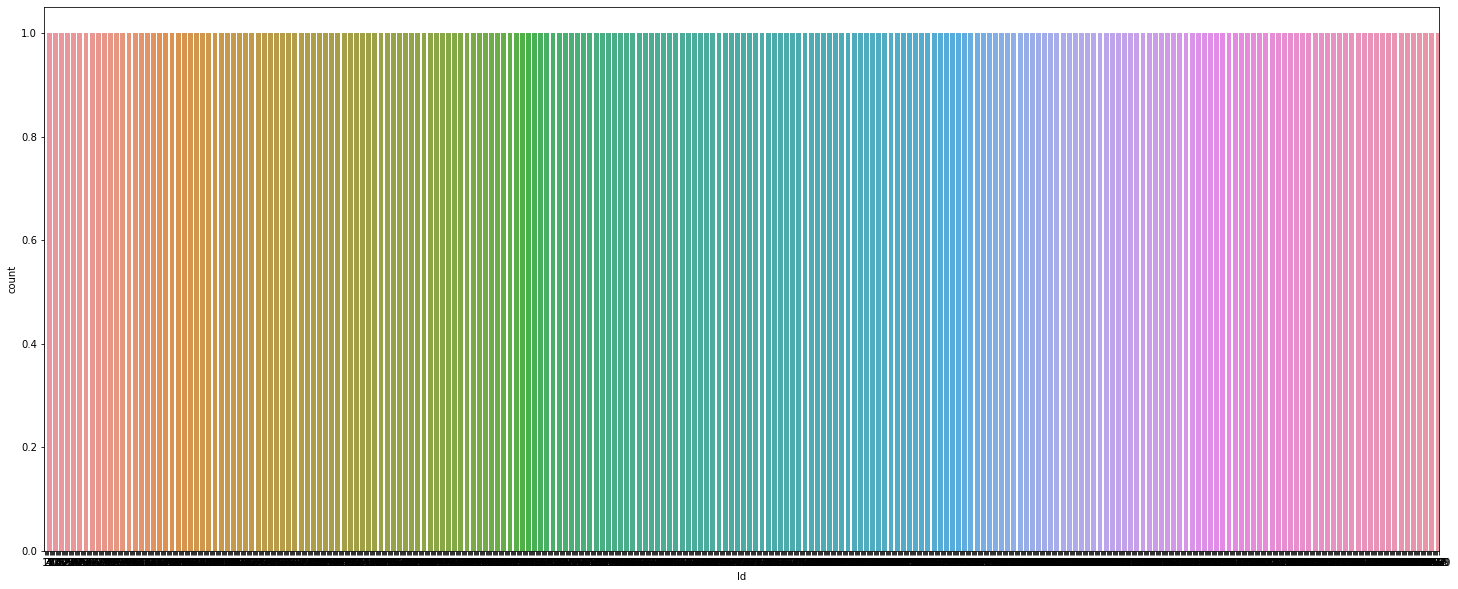

In [380]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Id", data=data_train)
print(data_train["Id"].value_counts())

In [381]:
#As the id is unique to all, its safe to drop this column

data_train=data_train.drop(columns=["Id"])

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


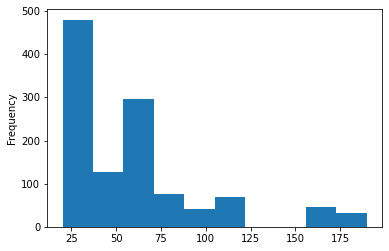

In [382]:
data_train.MSSubClass.plot(kind='hist')
print(data_train["MSSubClass"].value_counts())

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


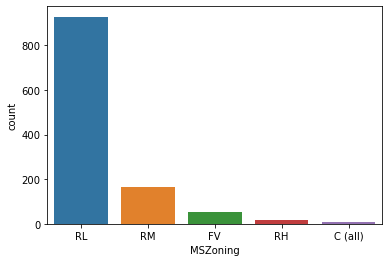

In [383]:
ax=sns.countplot(x="MSZoning", data=data_train)
print(data_train["MSZoning"].value_counts())

In [384]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["MSZoning"])
data_train["MSZoning"]=df

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64


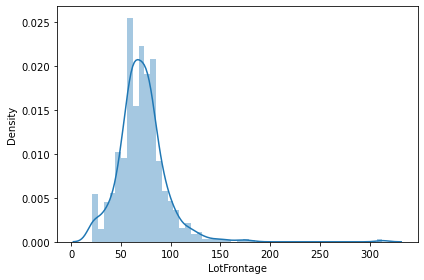

In [385]:
sns.distplot(data_train["LotFrontage"])
plt.xlabel("LotFrontage",fontsize=10)
plt.tight_layout()
print(data_train["LotFrontage"].value_counts())

9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64


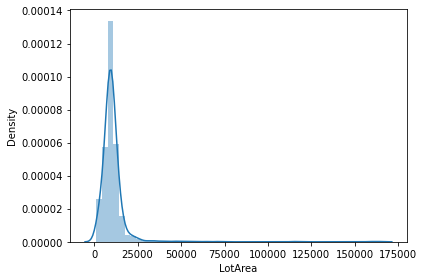

In [386]:
sns.distplot(data_train["LotArea"])
plt.xlabel("LotArea",fontsize=10)
plt.tight_layout()
print(data_train["LotArea"].value_counts())

Pave    1164
Grvl       4
Name: Street, dtype: int64


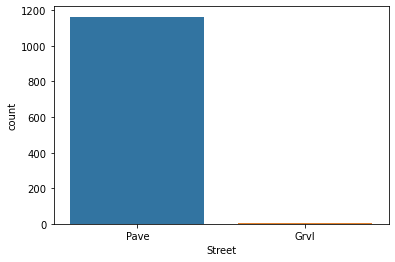

In [387]:
ax=sns.countplot(x="Street", data=data_train)
print(data_train["Street"].value_counts())

In [388]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Street"])
data_train["Street"]=df

Grvl    41
Pave    36
Name: Alley, dtype: int64


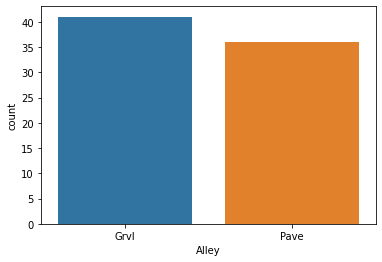

In [389]:
ax=sns.countplot(x="Alley", data=data_train)
print(data_train["Alley"].value_counts())

In [390]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Alley"])
data_train["Alley"]=df

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


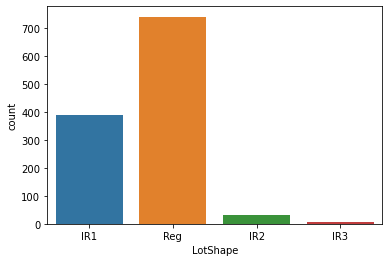

In [391]:
ax=sns.countplot(x="LotShape", data=data_train)
print(data_train["LotShape"].value_counts())

In [392]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["LotShape"])
data_train["LotShape"]=df

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


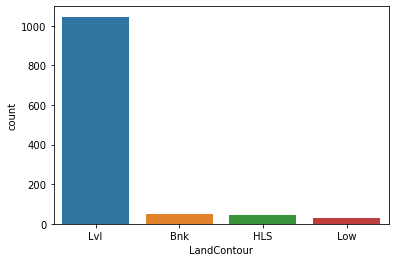

In [393]:
ax=sns.countplot(x="LandContour", data=data_train)
print(data_train["LandContour"].value_counts())

In [394]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["LandContour"])
data_train["LandContour"]=df

AllPub    1168
Name: Utilities, dtype: int64


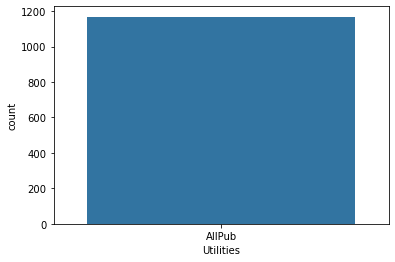

In [395]:
ax=sns.countplot(x="Utilities", data=data_train)
print(data_train["Utilities"].value_counts())

In [396]:
#As all have the same utilities, its safe to drop this column

data_train=data_train.drop(columns=["Utilities"])

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


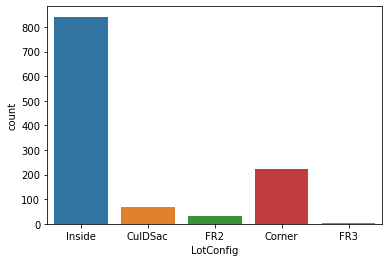

In [397]:
ax=sns.countplot(x="LotConfig", data=data_train)
print(data_train["LotConfig"].value_counts())

In [398]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["LotConfig"])
data_train["LotConfig"]=df

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


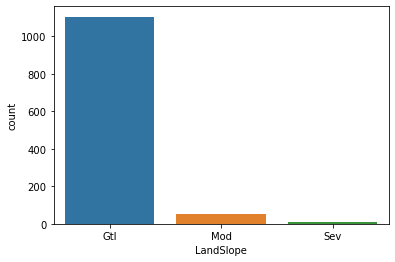

In [399]:
ax=sns.countplot(x="LandSlope", data=data_train)
print(data_train["LandSlope"].value_counts())

In [400]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["LandSlope"])
data_train["LandSlope"]=df

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


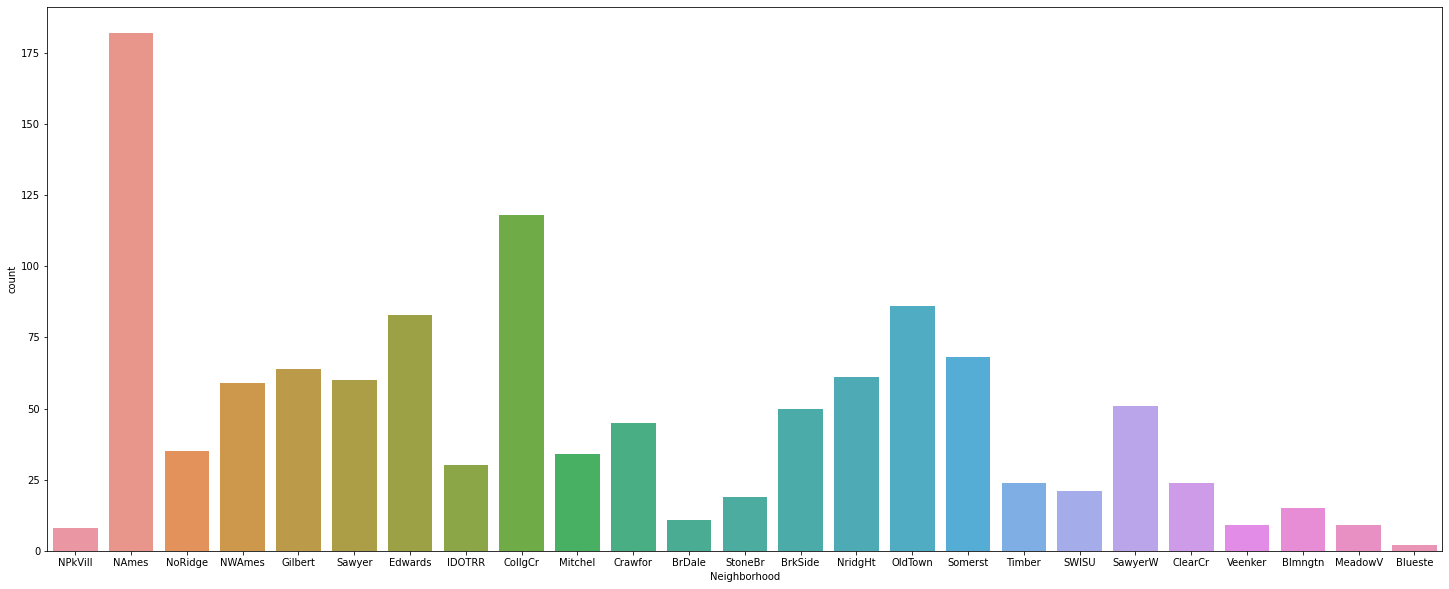

In [401]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Neighborhood", data=data_train)
print(data_train["Neighborhood"].value_counts())

In [402]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Neighborhood"])
data_train["Neighborhood"]=df

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


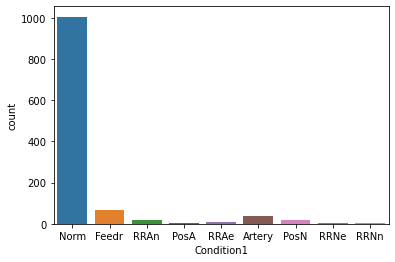

In [403]:
ax=sns.countplot(x="Condition1", data=data_train)
print(data_train["Condition1"].value_counts())

In [404]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Condition1"])
data_train["Condition1"]=df

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


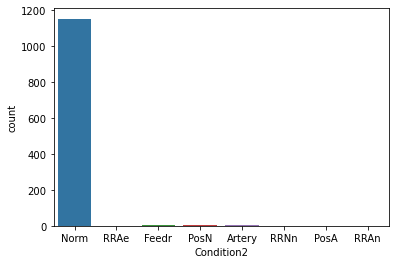

In [405]:
ax=sns.countplot(x="Condition2", data=data_train)
print(data_train["Condition2"].value_counts())

In [406]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Condition2"])
data_train["Condition2"]=df

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


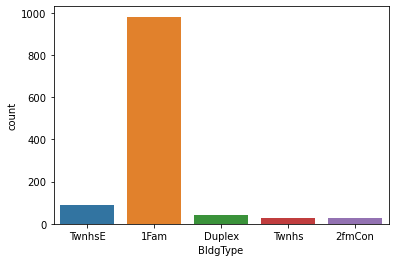

In [407]:
ax=sns.countplot(x="BldgType", data=data_train)
print(data_train["BldgType"].value_counts())

In [408]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["BldgType"])
data_train["BldgType"]=df

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


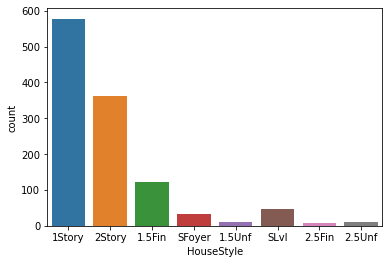

In [409]:
ax=sns.countplot(x="HouseStyle", data=data_train)
print(data_train["HouseStyle"].value_counts())

In [410]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["HouseStyle"])
data_train["HouseStyle"]=df

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


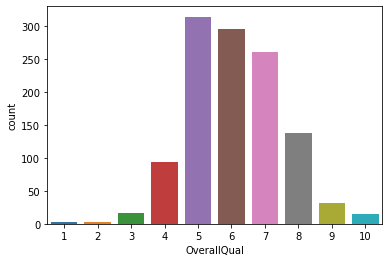

In [411]:
ax=sns.countplot(x="OverallQual", data=data_train)
print(data_train["OverallQual"].value_counts())

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64


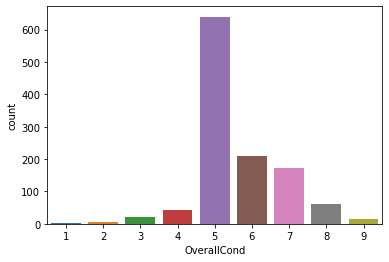

In [412]:
ax=sns.countplot(x="OverallCond", data=data_train)
print(data_train["OverallCond"].value_counts())

<AxesSubplot:ylabel='Frequency'>

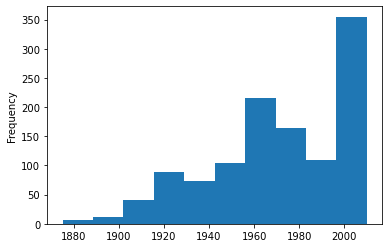

In [413]:
data_train.YearBuilt.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

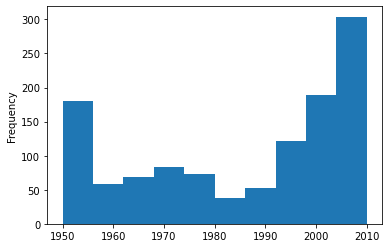

In [414]:
data_train.YearRemodAdd.plot(kind='hist')

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


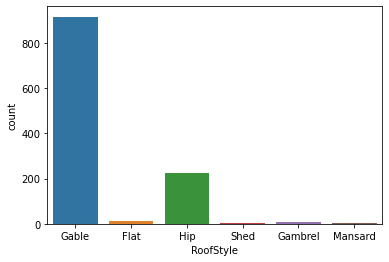

In [415]:
ax=sns.countplot(x="RoofStyle", data=data_train)
print(data_train["RoofStyle"].value_counts())

In [416]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["RoofStyle"])
data_train["RoofStyle"]=df

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64


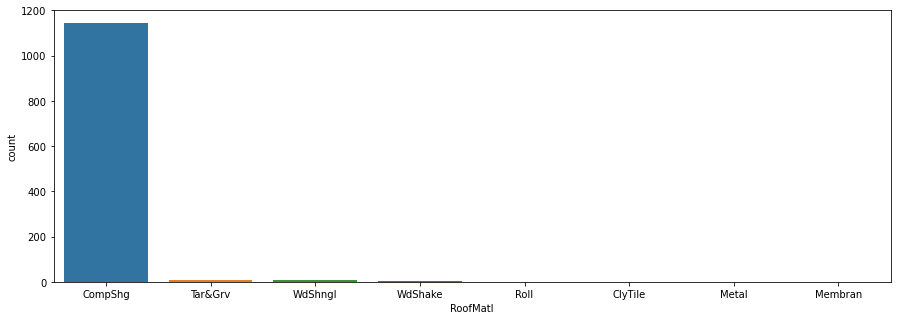

In [417]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="RoofMatl", data=data_train)
print(data_train["RoofMatl"].value_counts())

In [418]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["RoofMatl"])
data_train["RoofMatl"]=df

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
Name: Exterior1st, dtype: int64


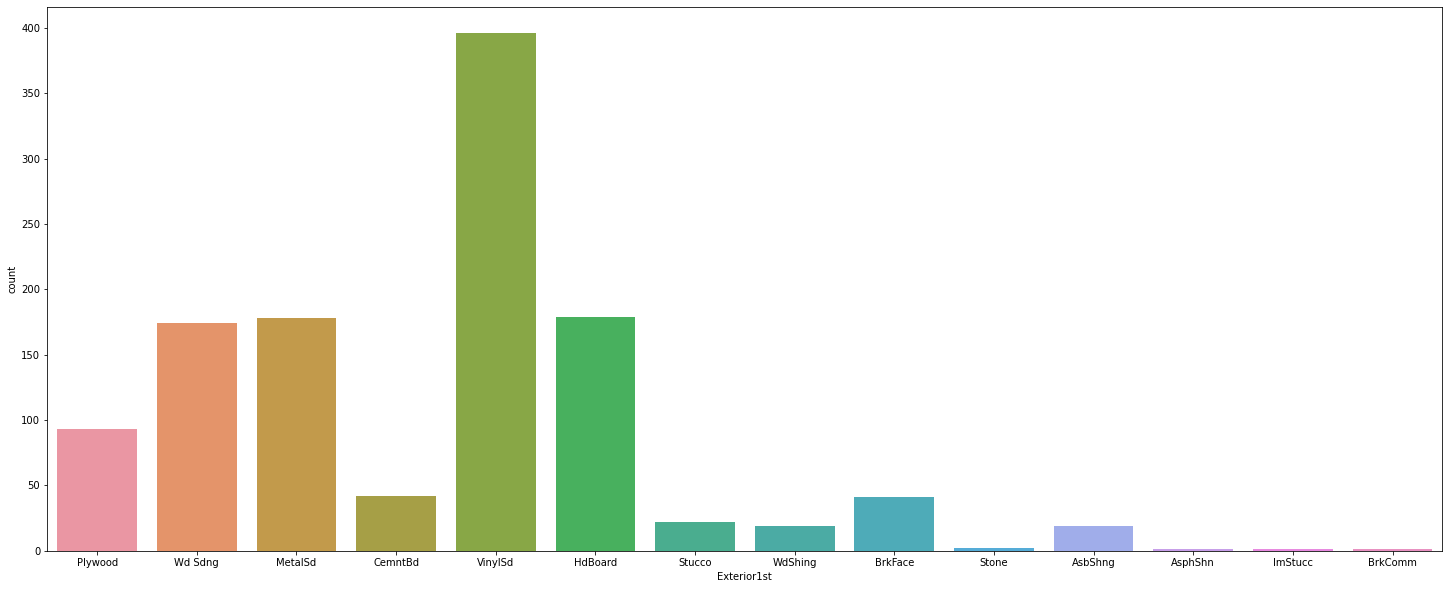

In [419]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Exterior1st", data=data_train)
print(data_train["Exterior1st"].value_counts())

In [420]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Exterior1st"])
data_train["Exterior1st"]=df

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


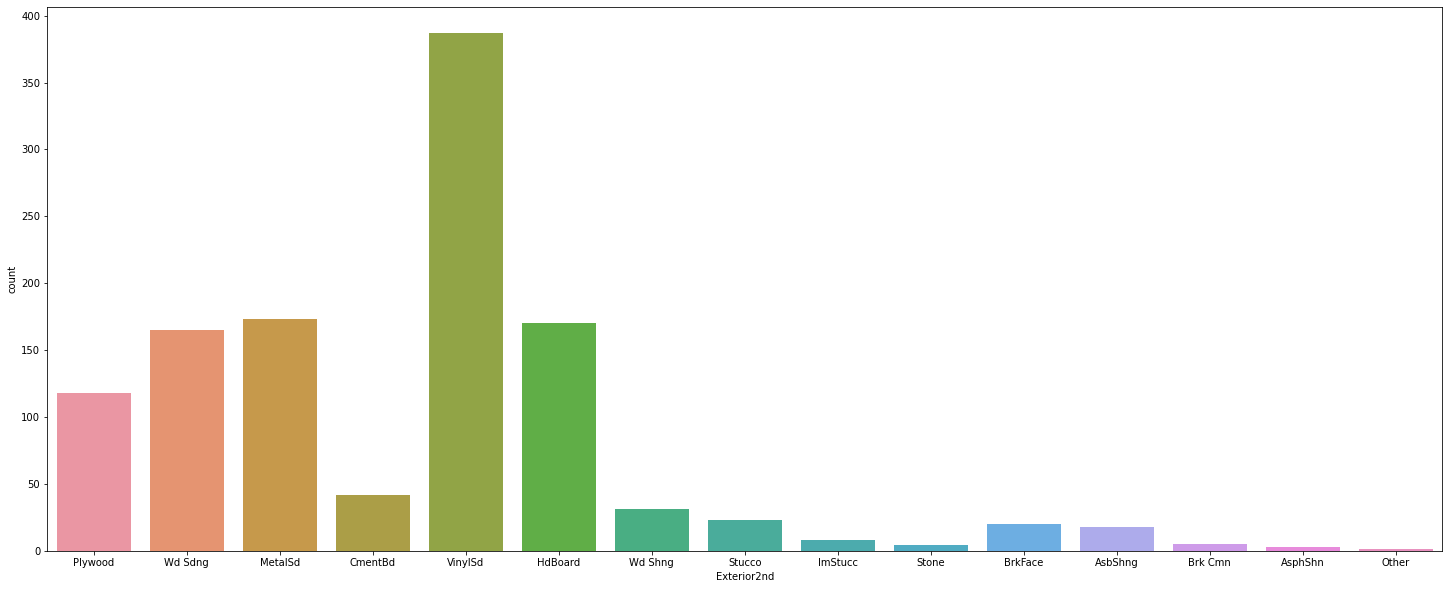

In [421]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Exterior2nd", data=data_train)
print(data_train["Exterior2nd"].value_counts())

In [422]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Exterior2nd"])
data_train["Exterior2nd"]=df

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


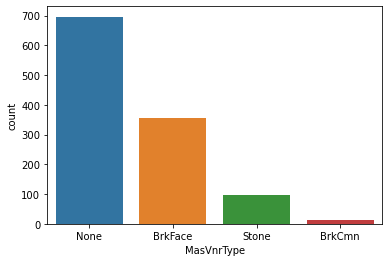

In [423]:
ax=sns.countplot(x="MasVnrType", data=data_train)
print(data_train["MasVnrType"].value_counts())

In [424]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["MasVnrType"])
data_train["MasVnrType"]=df

In [425]:
#Replacing null value with the mode of the column

data_train["MasVnrType"]=data_train["MasVnrType"].replace(4,data_train["MasVnrType"].mode()[0])

0.0      692
72.0       7
180.0      6
120.0      6
106.0      5
        ... 
653.0      1
975.0      1
226.0      1
204.0      1
31.0       1
Name: MasVnrArea, Length: 283, dtype: int64


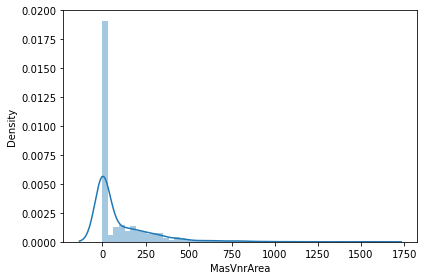

In [426]:
sns.distplot(data_train["MasVnrArea"])
plt.xlabel("MasVnrArea",fontsize=10)
plt.tight_layout()
print(data_train["MasVnrArea"].value_counts())

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


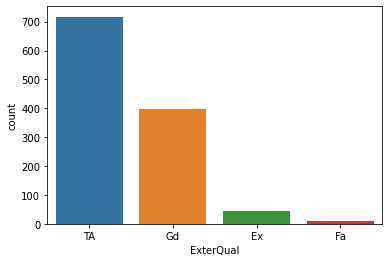

In [427]:
ax=sns.countplot(x="ExterQual", data=data_train)
print(data_train["ExterQual"].value_counts())

In [428]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["ExterQual"])
data_train["ExterQual"]=df

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


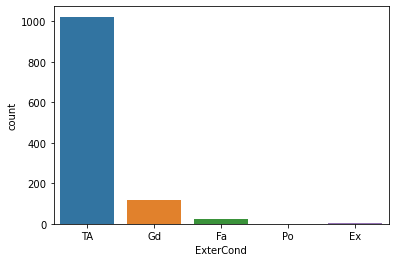

In [429]:
ax=sns.countplot(x="ExterCond", data=data_train)
print(data_train["ExterCond"].value_counts())

In [430]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["ExterCond"])
data_train["ExterCond"]=df

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


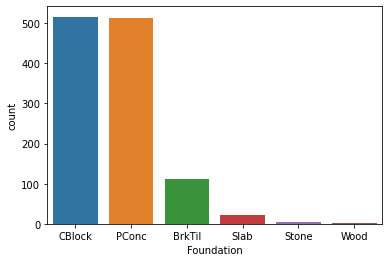

In [431]:
ax=sns.countplot(x="Foundation", data=data_train)
print(data_train["Foundation"].value_counts())

In [432]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Foundation"])
data_train["Foundation"]=df

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


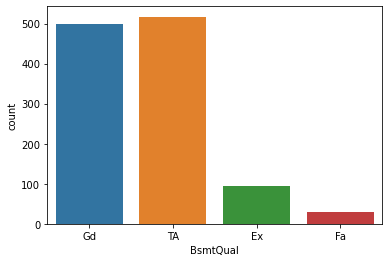

In [433]:
ax=sns.countplot(x="BsmtQual", data=data_train)
print(data_train["BsmtQual"].value_counts())

In [434]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["BsmtQual"])
data_train["BsmtQual"]=df

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


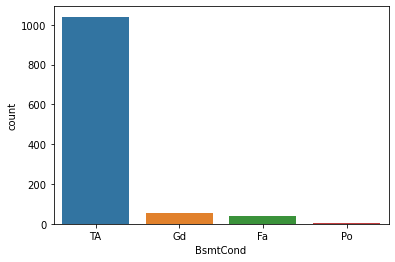

In [435]:
ax=sns.countplot(x="BsmtCond", data=data_train)
print(data_train["BsmtCond"].value_counts())

In [436]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["BsmtCond"])
data_train["BsmtCond"]=df

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


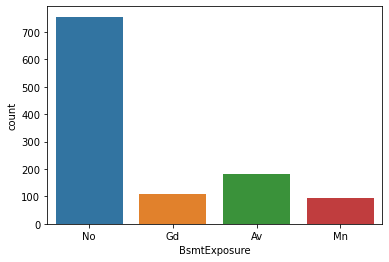

In [437]:
ax=sns.countplot(x="BsmtExposure", data=data_train)
print(data_train["BsmtExposure"].value_counts())

In [438]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["BsmtExposure"])
data_train["BsmtExposure"]=df

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


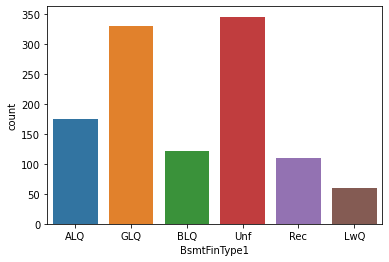

In [439]:
ax=sns.countplot(x="BsmtFinType1", data=data_train)
print(data_train["BsmtFinType1"].value_counts())

In [440]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["BsmtFinType1"])
data_train["BsmtFinType1"]=df

0      375
24      10
16       8
20       5
616      5
      ... 
586      1
412      1
416      1
602      1
457      1
Name: BsmtFinSF1, Length: 551, dtype: int64


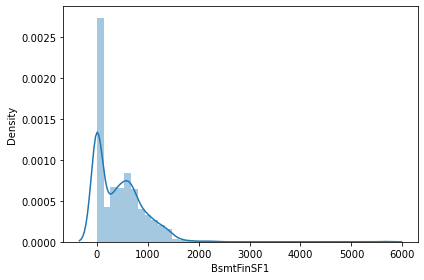

In [441]:
sns.distplot(data_train["BsmtFinSF1"])
plt.xlabel("BsmtFinSF1",fontsize=10)
plt.tight_layout()
print(data_train["BsmtFinSF1"].value_counts())

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


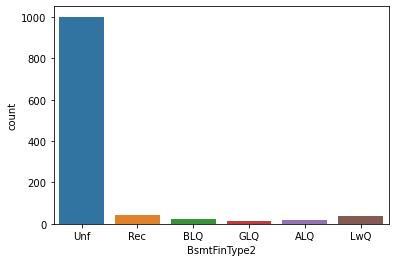

In [442]:
ax=sns.countplot(x="BsmtFinType2", data=data_train)
print(data_train["BsmtFinType2"].value_counts())

In [443]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["BsmtFinType2"])
data_train["BsmtFinType2"]=df

0      1032
180       5
41        2
147       2
117       2
       ... 
531       1
40        1
121       1
608       1
546       1
Name: BsmtFinSF2, Length: 122, dtype: int64


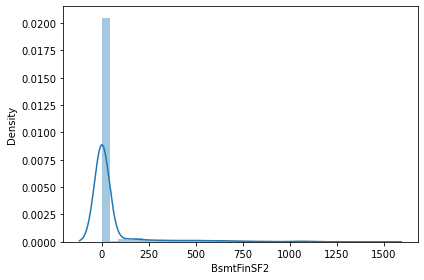

In [444]:
sns.distplot(data_train["BsmtFinSF2"])
plt.xlabel("BsmtFinSF2",fontsize=10)
plt.tight_layout()
print(data_train["BsmtFinSF2"].value_counts())

0      97
728     8
440     6
600     6
300     6
       ..
323     1
487     1
349     1
793     1
649     1
Name: BsmtUnfSF, Length: 681, dtype: int64


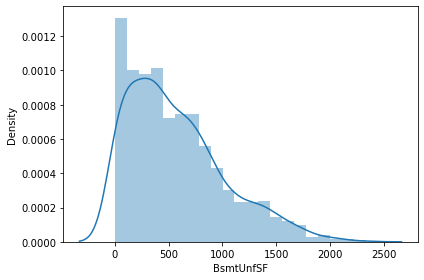

In [445]:
sns.distplot(data_train["BsmtUnfSF"])
plt.xlabel("BsmtUnfSF",fontsize=10)
plt.tight_layout()
print(data_train["BsmtUnfSF"].value_counts())

0       30
864     28
912     13
672     13
816     12
        ..
319      1
1318     1
1198     1
1251     1
1582     1
Name: TotalBsmtSF, Length: 636, dtype: int64


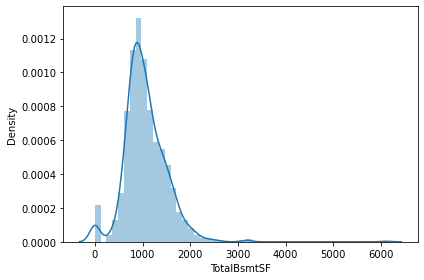

In [446]:
sns.distplot(data_train["TotalBsmtSF"])
plt.xlabel("TotalBsmtSF",fontsize=10)
plt.tight_layout()
print(data_train["TotalBsmtSF"].value_counts())

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


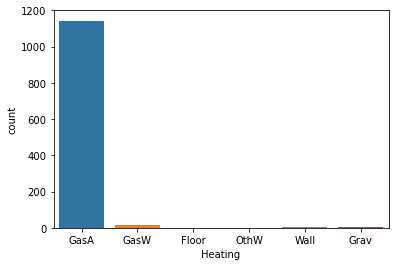

In [447]:
ax=sns.countplot(x="Heating", data=data_train)
print(data_train["Heating"].value_counts())

In [448]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Heating"])
data_train["Heating"]=df

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


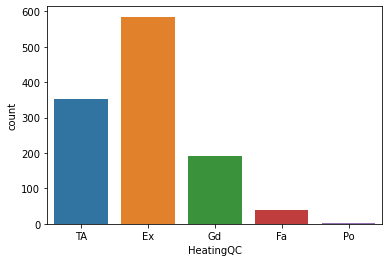

In [449]:
ax=sns.countplot(x="HeatingQC", data=data_train)
print(data_train["HeatingQC"].value_counts())

In [450]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["HeatingQC"])
data_train["HeatingQC"]=df

Y    1090
N      78
Name: CentralAir, dtype: int64


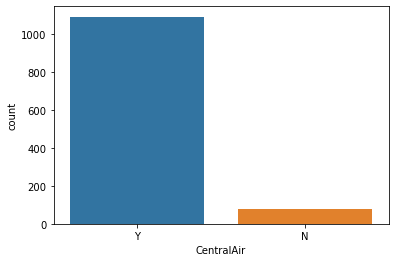

In [451]:
ax=sns.countplot(x="CentralAir", data=data_train)
print(data_train["CentralAir"].value_counts())

In [452]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["CentralAir"])
data_train["CentralAir"]=df

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


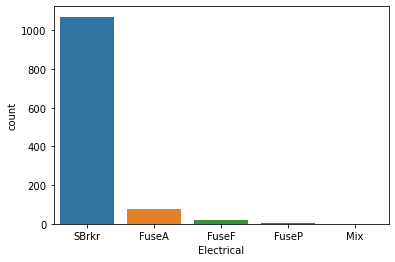

In [453]:
ax=sns.countplot(x="Electrical", data=data_train)
print(data_train["Electrical"].value_counts())

In [454]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Electrical"])
data_train["Electrical"]=df

864     19
1040    13
912     12
894     10
848      9
        ..
1516     1
813      1
2633     1
1015     1
807      1
Name: 1stFlrSF, Length: 669, dtype: int64


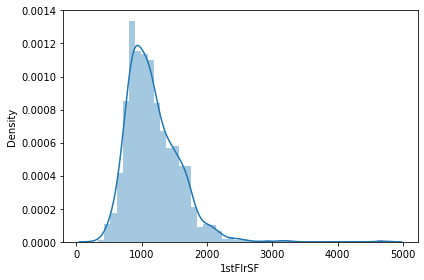

In [455]:
sns.distplot(data_train["1stFlrSF"])
plt.xlabel("1stFlrSF",fontsize=10)
plt.tight_layout()
print(data_train["1stFlrSF"].value_counts())

0       663
728       9
504       7
600       6
672       6
       ... 
1066      1
467       1
1038      1
881       1
978       1
Name: 2ndFlrSF, Length: 351, dtype: int64


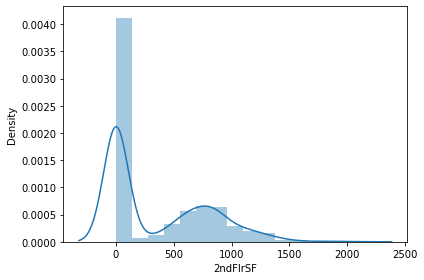

In [456]:
sns.distplot(data_train["2ndFlrSF"])
plt.xlabel("2ndFlrSF",fontsize=10)
plt.tight_layout()
print(data_train["2ndFlrSF"].value_counts())

0      1145
80        3
360       2
384       1
420       1
473       1
371       1
232       1
513       1
481       1
515       1
514       1
120       1
528       1
572       1
144       1
234       1
390       1
156       1
53        1
392       1
Name: LowQualFinSF, dtype: int64


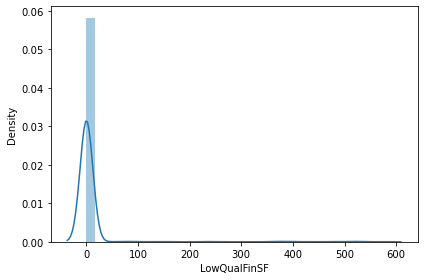

In [457]:
sns.distplot(data_train["LowQualFinSF"])
plt.xlabel("LowQualFinSF",fontsize=10)
plt.tight_layout()
print(data_train["LowQualFinSF"].value_counts())

864     16
1040    11
894     10
1456     9
1200     8
        ..
1610     1
2576     1
2810     1
1691     1
1509     1
Name: GrLivArea, Length: 746, dtype: int64


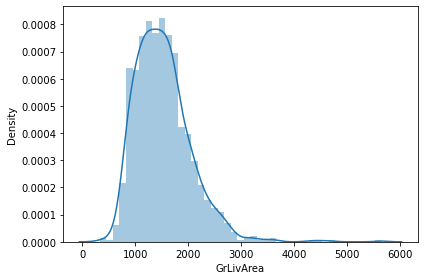

In [458]:
sns.distplot(data_train["GrLivArea"])
plt.xlabel("GrLivArea",fontsize=10)
plt.tight_layout()
print(data_train["GrLivArea"].value_counts())

0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64


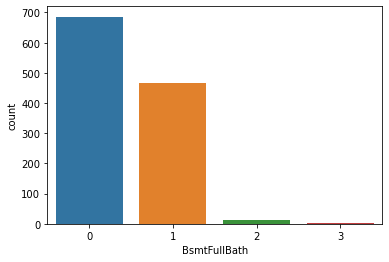

In [459]:
ax=sns.countplot(x="BsmtFullBath", data=data_train)
print(data_train["BsmtFullBath"].value_counts())

0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64


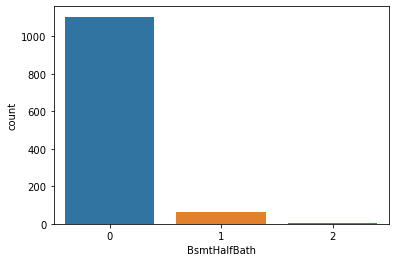

In [460]:
ax=sns.countplot(x="BsmtHalfBath", data=data_train)
print(data_train["BsmtHalfBath"].value_counts())

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64


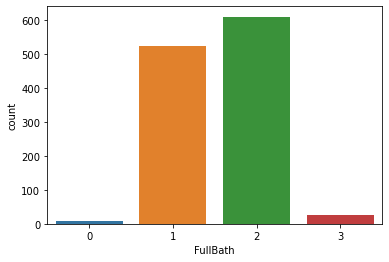

In [461]:
ax=sns.countplot(x="FullBath", data=data_train)
print(data_train["FullBath"].value_counts())

0    724
1    434
2     10
Name: HalfBath, dtype: int64


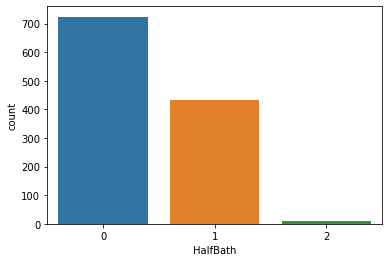

In [462]:
ax=sns.countplot(x="HalfBath", data=data_train)
print(data_train["HalfBath"].value_counts())

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64


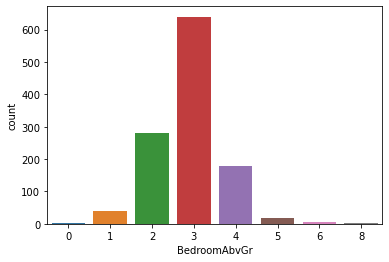

In [463]:
ax=sns.countplot(x="BedroomAbvGr", data=data_train)
print(data_train["BedroomAbvGr"].value_counts())

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64


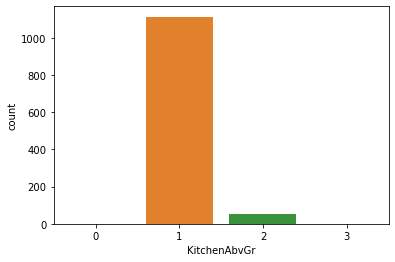

In [464]:
ax=sns.countplot(x="KitchenAbvGr", data=data_train)
print(data_train["KitchenAbvGr"].value_counts())

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


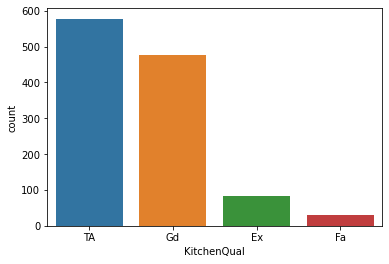

In [465]:
ax=sns.countplot(x="KitchenQual", data=data_train)
print(data_train["KitchenQual"].value_counts())

In [466]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["KitchenQual"])
data_train["KitchenQual"]=df

6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


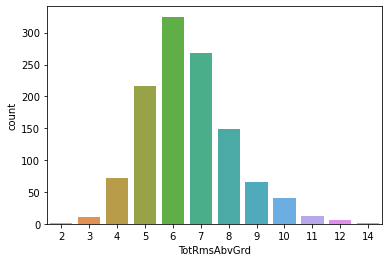

In [467]:
ax=sns.countplot(x="TotRmsAbvGrd", data=data_train)
print(data_train["TotRmsAbvGrd"].value_counts())

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


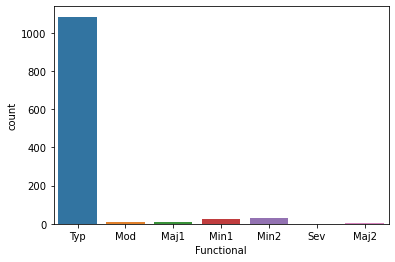

In [468]:
ax=sns.countplot(x="Functional", data=data_train)
print(data_train["Functional"].value_counts())

In [469]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Functional"])
data_train["Functional"]=df

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64


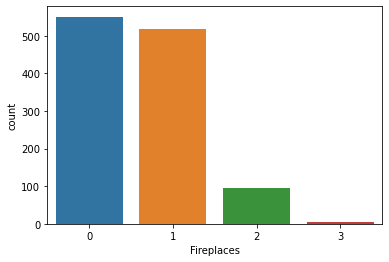

In [470]:
ax=sns.countplot(x="Fireplaces", data=data_train)
print(data_train["Fireplaces"].value_counts())

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


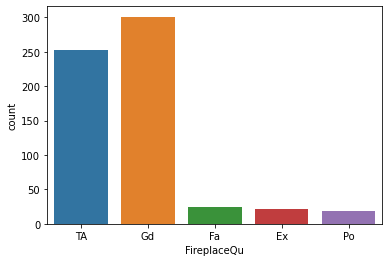

In [471]:
ax=sns.countplot(x="FireplaceQu", data=data_train)
print(data_train["FireplaceQu"].value_counts())

In [472]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["FireplaceQu"])
data_train["FireplaceQu"]=df

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


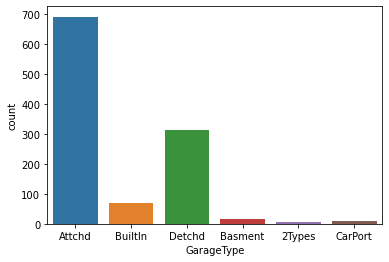

In [473]:
ax=sns.countplot(x="GarageType", data=data_train)
print(data_train["GarageType"].value_counts())

In [474]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["GarageType"])
data_train["GarageType"]=df

<AxesSubplot:ylabel='Frequency'>

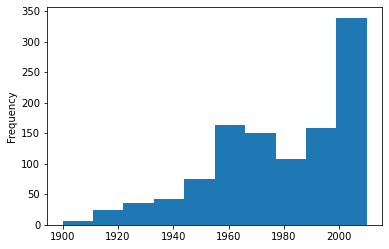

In [475]:
data_train.GarageYrBlt.plot(kind='hist')

In [476]:
# Wherever the garages are not present, there are null years. Filling these nulls with 0
data_train['GarageYrBlt']=data_train['GarageYrBlt'].fillna(0)

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


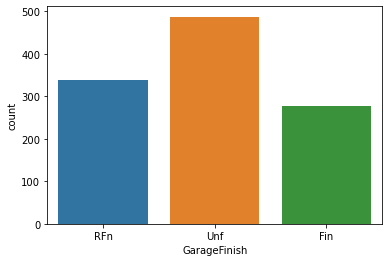

In [477]:
ax=sns.countplot(x="GarageFinish", data=data_train)
print(data_train["GarageFinish"].value_counts())

In [478]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["GarageFinish"])
data_train["GarageFinish"]=df

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64


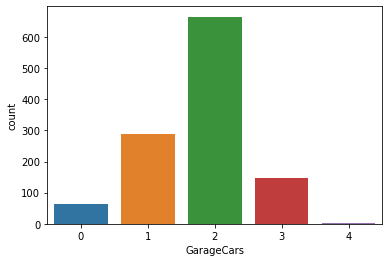

In [479]:
ax=sns.countplot(x="GarageCars", data=data_train)
print(data_train["GarageCars"].value_counts())

0      64
440    44
576    39
240    31
528    26
       ..
748     1
433     1
818     1
604     1
250     1
Name: GarageArea, Length: 392, dtype: int64


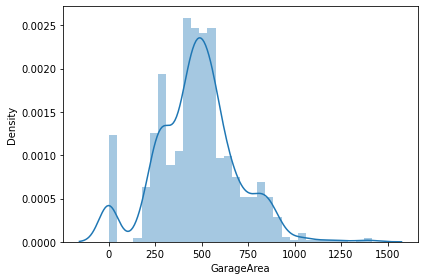

In [480]:
sns.distplot(data_train["GarageArea"])
plt.xlabel("GarageArea",fontsize=10)
plt.tight_layout()
print(data_train["GarageArea"].value_counts())

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64


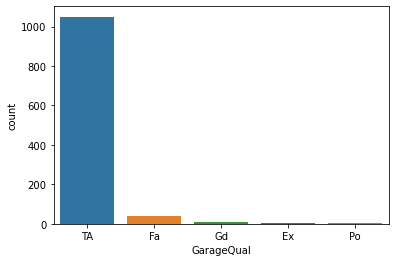

In [481]:
ax=sns.countplot(x="GarageQual", data=data_train)
print(data_train["GarageQual"].value_counts())

In [482]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["GarageQual"])
data_train["GarageQual"]=df

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


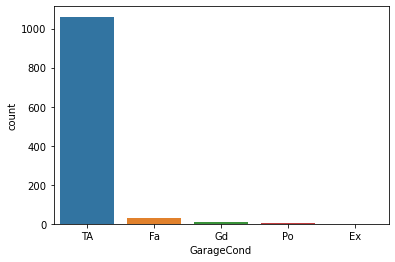

In [483]:
ax=sns.countplot(x="GarageCond", data=data_train)
print(data_train["GarageCond"].value_counts())

In [484]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["GarageCond"])
data_train["GarageCond"]=df

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


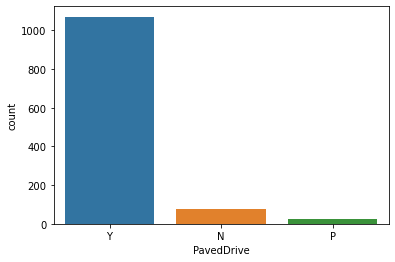

In [485]:
ax=sns.countplot(x="PavedDrive", data=data_train)
print(data_train["PavedDrive"].value_counts())

In [486]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["PavedDrive"])
data_train["PavedDrive"]=df

0      603
144     29
192     28
100     26
120     25
      ... 
278      1
70       1
351      1
314      1
87       1
Name: WoodDeckSF, Length: 244, dtype: int64


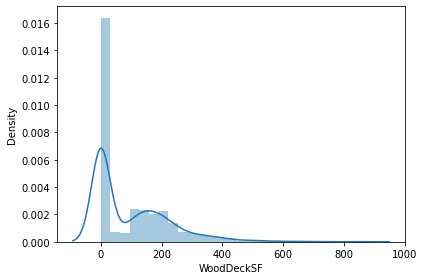

In [487]:
sns.distplot(data_train["WoodDeckSF"])
plt.xlabel("WoodDeckSF",fontsize=10)
plt.tight_layout()
print(data_train["WoodDeckSF"].value_counts())

0      531
36      24
48      18
20      17
39      14
      ... 
406      1
176      1
137      1
135      1
15       1
Name: OpenPorchSF, Length: 176, dtype: int64


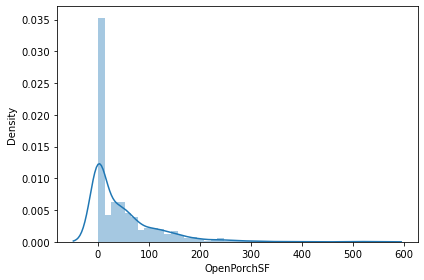

In [488]:
sns.distplot(data_train["OpenPorchSF"])
plt.xlabel("OpenPorchSF",fontsize=10)
plt.tight_layout()
print(data_train["OpenPorchSF"].value_counts())

0      999
112     13
96       6
192      5
216      5
      ... 
80       1
242      1
136      1
272      1
172      1
Name: EnclosedPorch, Length: 106, dtype: int64


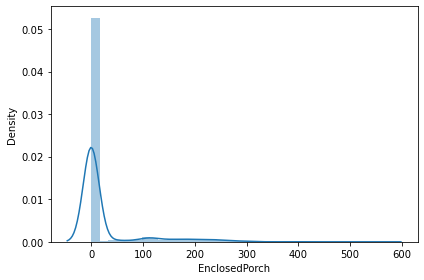

In [489]:
sns.distplot(data_train["EnclosedPorch"])
plt.xlabel("EnclosedPorch",fontsize=10)
plt.tight_layout()
print(data_train["EnclosedPorch"].value_counts())

0      1146
168       3
216       2
180       2
144       2
153       1
23        1
304       1
130       1
182       1
290       1
238       1
245       1
162       1
96        1
140       1
196       1
508       1
Name: 3SsnPorch, dtype: int64


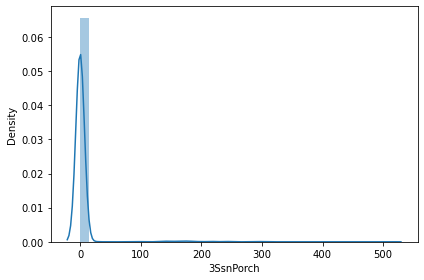

In [490]:
sns.distplot(data_train["3SsnPorch"])
plt.xlabel("3SsnPorch",fontsize=10)
plt.tight_layout()
print(data_train["3SsnPorch"].value_counts())

0      1073
192       5
224       5
189       4
180       3
       ... 
273       1
99        1
122       1
80        1
130       1
Name: ScreenPorch, Length: 65, dtype: int64


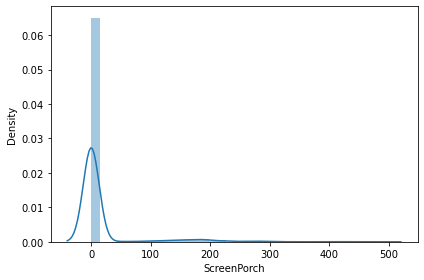

In [491]:
sns.distplot(data_train["ScreenPorch"])
plt.xlabel("ScreenPorch",fontsize=10)
plt.tight_layout()
print(data_train["ScreenPorch"].value_counts())

0      1161
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: PoolArea, dtype: int64


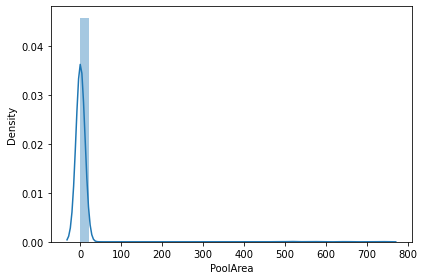

In [492]:
sns.distplot(data_train["PoolArea"])
plt.xlabel("PoolArea",fontsize=10)
plt.tight_layout()
print(data_train["PoolArea"].value_counts())

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


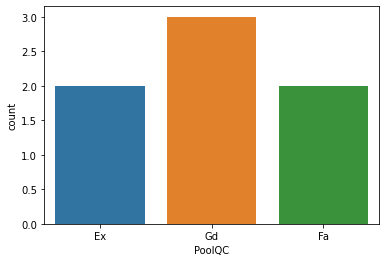

In [493]:
ax=sns.countplot(x="PoolQC", data=data_train)
print(data_train["PoolQC"].value_counts())

In [494]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["PoolQC"])
data_train["PoolQC"]=df

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64


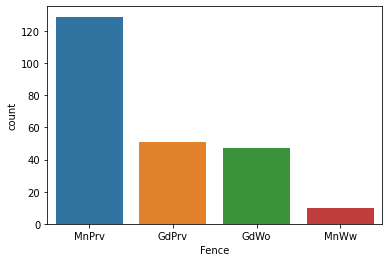

In [495]:
ax=sns.countplot(x="Fence", data=data_train)
print(data_train["Fence"].value_counts())

In [496]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Fence"])
data_train["Fence"]=df

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64


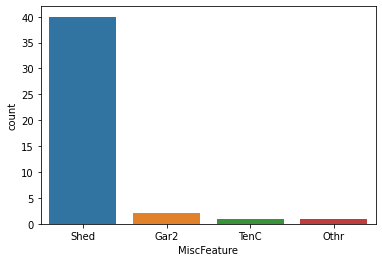

In [497]:
ax=sns.countplot(x="MiscFeature", data=data_train)
print(data_train["MiscFeature"].value_counts())

In [498]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["MiscFeature"])
data_train["MiscFeature"]=df

0        1126
400        10
500         7
2000        4
600         3
700         3
1200        2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: MiscVal, dtype: int64


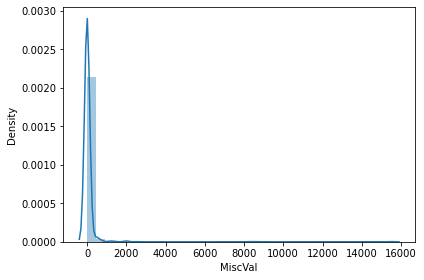

In [499]:
sns.distplot(data_train["MiscVal"])
plt.xlabel("MiscVal",fontsize=10)
plt.tight_layout()
print(data_train["MiscVal"].value_counts())

<AxesSubplot:ylabel='Frequency'>

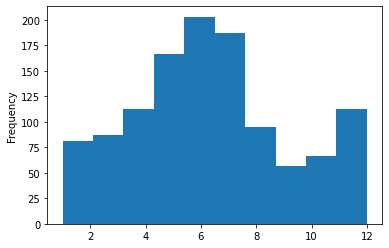

In [500]:
data_train.MoSold.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

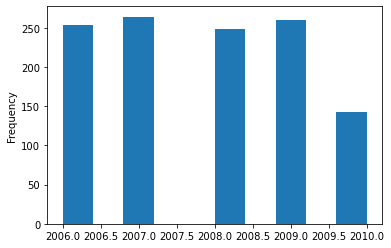

In [501]:
data_train.YrSold.plot(kind='hist')

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


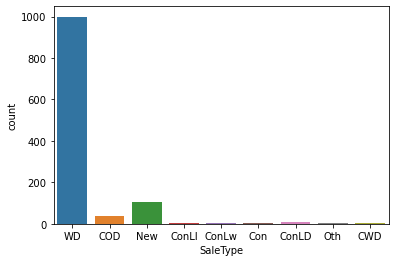

In [502]:
ax=sns.countplot(x="SaleType", data=data_train)
print(data_train["SaleType"].value_counts())

In [503]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["SaleType"])
data_train["SaleType"]=df

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


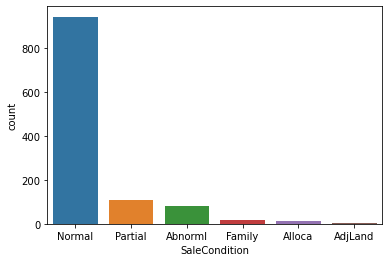

In [504]:
ax=sns.countplot(x="SaleCondition", data=data_train)
print(data_train["SaleCondition"].value_counts())

In [505]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["SaleCondition"])
data_train["SaleCondition"]=df

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
203000     1
144900     1
37900      1
178400     1
183200     1
Name: SalePrice, Length: 581, dtype: int64


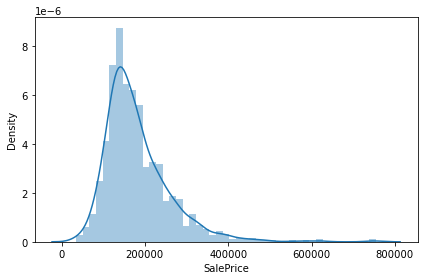

In [506]:
sns.distplot(data_train["SalePrice"])
plt.xlabel("SalePrice",fontsize=10)
plt.tight_layout()
print(data_train["SalePrice"].value_counts())

In [507]:
# Checking for null values
for column in data_train:
    print(column,"----------------",data_train[column].isnull().sum())

MSSubClass ---------------- 0
MSZoning ---------------- 0
LotFrontage ---------------- 214
LotArea ---------------- 0
Street ---------------- 0
Alley ---------------- 0
LotShape ---------------- 0
LandContour ---------------- 0
LotConfig ---------------- 0
LandSlope ---------------- 0
Neighborhood ---------------- 0
Condition1 ---------------- 0
Condition2 ---------------- 0
BldgType ---------------- 0
HouseStyle ---------------- 0
OverallQual ---------------- 0
OverallCond ---------------- 0
YearBuilt ---------------- 0
YearRemodAdd ---------------- 0
RoofStyle ---------------- 0
RoofMatl ---------------- 0
Exterior1st ---------------- 0
Exterior2nd ---------------- 0
MasVnrType ---------------- 0
MasVnrArea ---------------- 7
ExterQual ---------------- 0
ExterCond ---------------- 0
Foundation ---------------- 0
BsmtQual ---------------- 0
BsmtCond ---------------- 0
BsmtExposure ---------------- 0
BsmtFinType1 ---------------- 0
BsmtFinSF1 ---------------- 0
BsmtFinType2 -----------

In [508]:
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [509]:
#Imputing null values using KNN Imputer to replace Null with meaningful data

from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
df=pd.DataFrame(knnimp.fit_transform(data_train[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley','LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood','Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual','ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces','FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal','MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]), columns=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley','LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood','Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual','ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces','FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal','MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'])
data_train['LotFrontage']=df['LotFrontage']
data_train['MasVnrArea']=df['MasVnrArea']

In [510]:
#Statistical Analysis
for column in data_train:
    print("-----------", column, "--------------")
    print(data_train[column].describe())

----------- MSSubClass --------------
count    1168.000000
mean       56.767979
std        41.940650
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
----------- MSZoning --------------
count    1168.000000
mean        3.013699
std         0.633120
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: MSZoning, dtype: float64
----------- LotFrontage --------------
count    1168.000000
mean       71.724315
std        24.159328
min        21.000000
25%        60.000000
50%        70.000000
75%        81.000000
max       313.000000
Name: LotFrontage, dtype: float64
----------- LotArea --------------
count      1168.000000
mean      10484.749144
std        8957.442311
min        1300.000000
25%        7621.500000
50%        9522.500000
75%       11515.500000
max      164660.000000
Name: LotArea, dtype: float64
----------- Street --------------
co

# Checking Correlation

In [511]:
#Let's print the correlation coefficient for the Prediction with Price

corr_matrix=data_train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
                  ...   
FireplaceQu    -0.445910
GarageFinish   -0.550624
KitchenQual    -0.592468
ExterQual      -0.624820
BsmtQual       -0.628798
Name: SalePrice, Length: 79, dtype: float64

# Checking for outliers

In [512]:
data_train.shape

(1168, 79)

In [513]:
#visulaize the outliers using boxplot
plt.figure(figsize=(200,400))
graph=1

for column in data_train:
    if graph<=80:
        ax=plt.subplot(20,4,graph)
        sns.boxplot(data=data_train[column], orient='v')
        plt.xlabel(column,fontsize=80)
    graph=graph+1
plt.show()

In [514]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data_train))
z.shape

(1168, 79)

In [515]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 9, 20, 34, ..., 39, 62, 63], dtype=int64))


In [516]:
data_new=data_train[(z<3).all(axis=1)]
print(data_train.shape)
print(data_new.shape)

(1168, 79)
(437, 79)


# 
As the data loss is 62.58%, outliers are not removed

# Divide Data Set into x_train and y_train

In [517]:
y_train=data_train['SalePrice']
x_train=data_train.drop(columns=['SalePrice'])

# Visualizing Relationship

In [518]:
plt.figure(figsize=(50,200))
plotnumber=1

for column in x_train:
    if plotnumber<=80:
        ax=plt.subplot(20,4,plotnumber)
        plt.scatter(x_train[column],y_train)
        plt.xlabel(column,fontsize=60)
        plt.ylabel('SalePrice', fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()

# Selecting best features

In [519]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [520]:
SPercentile=SelectPercentile(score_func=chi2, percentile=80)

In [521]:
SPercentile=SPercentile.fit(x_train,y_train)

In [522]:
cols=SPercentile.get_support(indices=True)
features=x_train.columns[cols]

In [523]:
df_scores=pd.DataFrame({'features':x_train.columns, 'chi2score':SPercentile.scores_, 'pvalues':SPercentile.pvalues_})

In [524]:
df_scores.sort_values(by='chi2score', ascending=False)

features     chi2score  pvalues
3        LotArea  5.746267e+06      0.0
73       MiscVal  5.669726e+06      0.0
42      2ndFlrSF  3.837320e+05      0.0
34    BsmtFinSF2  3.407783e+05      0.0
32    BsmtFinSF1  3.338184e+05      0.0
..           ...           ...      ...
50  KitchenAbvGr  2.441720e+01      1.0
12    Condition2  1.586403e+01      1.0
70        PoolQC  4.376882e+00      1.0
4         Street  2.578465e+00      1.0
75        YrSold  5.200845e-01      1.0

[78 rows x 3 columns]

In [525]:
print(cols)
print(features)

[ 0  2  3  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25 27 28
 29 30 31 32 34 35 36 38 40 41 42 43 44 45 46 47 48 49 51 52 54 55 56 57
 58 59 60 64 65 66 67 68 69 71 73 74 76 77]
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'Ope

In [526]:
x_train=df[features]

# Checking for skewness

In [527]:
x_train.skew().sort_values(ascending=False)

MiscVal         23.065943
PoolArea        13.243711
LotArea         10.659285
3SsnPorch        9.770611
LowQualFinSF     8.666142
                  ...    
BsmtCond        -2.927336
Electrical      -3.104209
LandContour     -3.125982
SaleType        -3.660513
GarageYrBlt     -3.898694
Length: 62, dtype: float64

# Transforming Data to remove skewness

In [528]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x_train)

In [529]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x_train.columns)
x_skew.skew().sort_values(ascending=False)

PoolArea        12.817372
3SsnPorch        7.087955
LowQualFinSF     6.922843
MiscVal          4.991071
LandSlope        3.954345
                  ...    
SaleType        -2.067563
LandContour     -2.592303
Electrical      -3.006845
GarageYrBlt     -3.815690
RoofMatl        -6.314987
Length: 62, dtype: float64

In [530]:
x_train=x_skew

In [538]:
x_train

MSSubClass  LotFrontage   LotArea  LotShape  LandContour  LotConfig  \
0       1.370435    -0.480450 -1.213954 -1.366794     0.341434   0.617281   
1      -1.167999     1.021623  1.100521 -1.366794     0.341434   0.617281   
2       0.490047     0.912456  0.158048 -1.366794     0.341434  -1.482445   
3      -1.167999     1.369991  0.496002 -1.366794     0.341434   0.617281   
4      -1.167999    -0.164211  1.196626 -1.366794     0.341434  -1.025661   
...          ...          ...       ...       ...          ...        ...   
1163   -1.167999     0.699723  0.137703 -1.366794     0.341434   0.617281   
1164   -1.167999    -0.103503 -0.084786  0.753907     0.341434   0.617281   
1165    1.700798    -2.714083 -2.681835  0.753907     0.341434  -1.025661   
1166    0.696557    -0.946650 -0.148203  0.753907     0.341434   0.617281   
1167    0.490047    -0.210270 -0.302416 -1.366794     0.341434   0.617281   

      LandSlope  Neighborhood  Condition1  BldgType  ...  OpenPorchSF  \
0     -0.238775      0.198357    0.053284  2.310950  ...     1.409990   
1      4.188040      0.037086    0.053284 -0.436548  ...     1.414498   
2     -0.238775      0.512775    0.053284 -0.436548  ...     1.198911   
3     -0.238775      0.356843    0.053284 -0.436548  ...     1.169545   
4     -0.238775      0.356843    0.053284 -0.436548  ...    -1.061392   
...         ...           ...         ...       ...  ...          ...   
1163  -0.238775      1.114534    0.053284 -0.436548  ...    -1.061392   
1164  -0.238775     -0.822623   -1.390093 -0.436548  ...     1.058911   
1165  -0.238775      0.198357    0.053284  2.307761  ...    -1.061392   
1166  -0.238775     -0.466398   -1.390093 -0.436548  ...     0.794809   
1167  -0.238775     -0.642095    0.053284 -0.436548  ...     0.945305   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea     Fence   MiscVal  \
0         -0.411301  -0.138554    -0.297551 -0.077648  0.503226 -0.193133   
1         -0.411301  -0.138554     3.360787 -0.077648  0.503226 -0.193133   
2         -0.411301  -0.138554    -0.297551 -0.077648  0.503226 -0.193133   
3         -0.411301  -0.138554    -0.297551 -0.077648 -1.935972 -0.193133   
4         -0.411301  -0.138554    -0.297551 -0.077648  0.503226 -0.193133   
...             ...        ...          ...       ...       ...       ...   
1163      -0.411301  -0.138554    -0.297551 -0.077648 -1.935972 -0.193133   
1164      -0.411301  -0.138554    -0.297551 -0.077648 -1.935972 -0.193133   
1165      -0.411301  -0.138554    -0.297551 -0.077648  0.503226 -0.193133   
1166       2.433344  -0.138554    -0.297551 -0.077648 -1.935972 -0.193133   
1167      -0.411301  -0.138554    -0.297551 -0.077648  0.503226 -0.193133   

        MoSold  SaleType  SaleCondition  
0    -1.719437  0.409069       0.029735  
1     1.320612  0.409069       0.029735  
2    -0.076750  0.409069       0.029735  
3    -2.209015 -2.769993       0.029735  
4    -0.076750  0.409069       0.029735  
...        ...       ...            ...  
1163 -1.719437  0.409069       0.029735  
1164 -0.456480  0.409069       0.029735  
1165  0.288878  0.409069       0.029735  
1166  0.288878  0.409069       0.029735  
1167 -0.076750  0.409069       0.029735  

[1168 rows x 62 columns]

# Reading the test data (x_test)

In [531]:
#Read csv file and convert into Dataframe
data_test=pd.read_csv(r'D:\DataTrained\Flip Robo Technology Internship\Project-Housing_splitted\test.csv')
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [539]:
#Keeping only the selected features in the x_test
x_test=data_test.drop(columns=['Id','Utilities','MSZoning','Street','Alley','Condition2','ExterCond','BsmtFinType2','Heating','CentralAir','KitchenAbvGr','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature', 'YrSold'    ])

In [540]:
x_test

MSSubClass  LotFrontage  LotArea LotShape LandContour LotConfig  \
0            20         86.0    14157      IR1         HLS    Corner   
1           120          NaN     5814      IR1         Lvl   CulDSac   
2            20          NaN    11838      Reg         Lvl    Inside   
3            70         75.0    12000      Reg         Bnk    Inside   
4            60         86.0    14598      IR1         Lvl   CulDSac   
..          ...          ...      ...      ...         ...       ...   
287          20         78.0    10206      Reg         Lvl    Inside   
288          20         57.0     9245      IR2         Lvl    Inside   
289          20          NaN    11241      IR1         Lvl   CulDSac   
290          50         50.0     5000      Reg         Lvl    Corner   
291         160         21.0     1953      Reg         Lvl    Inside   

    LandSlope Neighborhood Condition1 BldgType  ... OpenPorchSF  \
0         Gtl      StoneBr       Norm     1Fam  ...          51   
1         Gtl      StoneBr       Norm   TwnhsE  ...           0   
2         Gtl      CollgCr       Norm     1Fam  ...         151   
3         Gtl      Crawfor       Norm     1Fam  ...           0   
4         Gtl      Somerst      Feedr     1Fam  ...          18   
..        ...          ...        ...      ...  ...         ...   
287       Gtl      Somerst       Norm     1Fam  ...          99   
288       Gtl      CollgCr       Norm     1Fam  ...           0   
289       Gtl        NAmes       Norm     1Fam  ...           0   
290       Gtl      BrkSide      Feedr     1Fam  ...          24   
291       Gtl       BrDale       Norm    Twnhs  ...           0   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea Fence MiscVal MoSold  \
0                0          0            0         0   NaN       0      7   
1                0          0            0         0   NaN       0      8   
2                0          0            0         0   NaN       0      6   
3                0          0            0         0   NaN       0      7   
4                0          0            0         0   NaN       0      1   
..             ...        ...          ...       ...   ...     ...    ...   
287              0          0            0         0   NaN       0     10   
288              0          0            0         0   NaN       0      2   
289              0          0            0         0   NaN     700      3   
290             36          0            0         0   NaN       0     10   
291              0          0            0         0   NaN       0      6   

    SaleType SaleCondition  
0         WD        Normal  
1        COD       Abnorml  
2         WD        Normal  
3         WD        Normal  
4         WD        Normal  
..       ...           ...  
287       WD        Normal  
288       WD        Normal  
289       WD        Normal  
290       WD        Normal  
291       WD        Normal  

[292 rows x 62 columns]

In [541]:
# Checking for data types of the columns
for column in x_test:
    print(column,"----------------",x_test[column].dtypes)

MSSubClass ---------------- int64
LotFrontage ---------------- float64
LotArea ---------------- int64
LotShape ---------------- object
LandContour ---------------- object
LotConfig ---------------- object
LandSlope ---------------- object
Neighborhood ---------------- object
Condition1 ---------------- object
BldgType ---------------- object
HouseStyle ---------------- object
OverallQual ---------------- int64
OverallCond ---------------- int64
YearBuilt ---------------- int64
YearRemodAdd ---------------- int64
RoofStyle ---------------- object
RoofMatl ---------------- object
Exterior1st ---------------- object
Exterior2nd ---------------- object
MasVnrType ---------------- object
MasVnrArea ---------------- float64
ExterQual ---------------- object
Foundation ---------------- object
BsmtQual ---------------- object
BsmtCond ---------------- object
BsmtExposure ---------------- object
BsmtFinType1 ---------------- object
BsmtFinSF1 ---------------- int64
BsmtFinSF2 ---------------- i

In [542]:
# Checking for null values
for column in x_test:
    print(column,"----------------",x_test[column].isnull().sum())

MSSubClass ---------------- 0
LotFrontage ---------------- 45
LotArea ---------------- 0
LotShape ---------------- 0
LandContour ---------------- 0
LotConfig ---------------- 0
LandSlope ---------------- 0
Neighborhood ---------------- 0
Condition1 ---------------- 0
BldgType ---------------- 0
HouseStyle ---------------- 0
OverallQual ---------------- 0
OverallCond ---------------- 0
YearBuilt ---------------- 0
YearRemodAdd ---------------- 0
RoofStyle ---------------- 0
RoofMatl ---------------- 0
Exterior1st ---------------- 0
Exterior2nd ---------------- 0
MasVnrType ---------------- 1
MasVnrArea ---------------- 1
ExterQual ---------------- 0
Foundation ---------------- 0
BsmtQual ---------------- 7
BsmtCond ---------------- 7
BsmtExposure ---------------- 7
BsmtFinType1 ---------------- 7
BsmtFinSF1 ---------------- 0
BsmtFinSF2 ---------------- 0
BsmtUnfSF ---------------- 0
TotalBsmtSF ---------------- 0
HeatingQC ---------------- 0
Electrical ---------------- 1
1stFlrSF -----

# Encoding object data type

In [543]:
from sklearn.preprocessing import LabelEncoder
for column in x_test:
    if x_test[column].dtypes==object:
        enc=LabelEncoder()
        df=enc.fit_transform(x_test[column])
        x_test[column]=df

In [546]:
#Replacing null value with the mode of the column

x_test["MasVnrType"]=x_test["MasVnrType"].replace(4,x_test["MasVnrType"].mode()[0])

In [548]:
# Wherever the garages are not present, there are null years. Filling these nulls with 0
x_test['GarageYrBlt']=x_test['GarageYrBlt'].fillna(0)

In [549]:
# Checking for null values
for column in x_test:
    print(column,"----------------",x_test[column].isnull().sum())

MSSubClass ---------------- 0
LotFrontage ---------------- 45
LotArea ---------------- 0
LotShape ---------------- 0
LandContour ---------------- 0
LotConfig ---------------- 0
LandSlope ---------------- 0
Neighborhood ---------------- 0
Condition1 ---------------- 0
BldgType ---------------- 0
HouseStyle ---------------- 0
OverallQual ---------------- 0
OverallCond ---------------- 0
YearBuilt ---------------- 0
YearRemodAdd ---------------- 0
RoofStyle ---------------- 0
RoofMatl ---------------- 0
Exterior1st ---------------- 0
Exterior2nd ---------------- 0
MasVnrType ---------------- 0
MasVnrArea ---------------- 1
ExterQual ---------------- 0
Foundation ---------------- 0
BsmtQual ---------------- 0
BsmtCond ---------------- 0
BsmtExposure ---------------- 0
BsmtFinType1 ---------------- 0
BsmtFinSF1 ---------------- 0
BsmtFinSF2 ---------------- 0
BsmtUnfSF ---------------- 0
TotalBsmtSF ---------------- 0
HeatingQC ---------------- 0
Electrical ---------------- 0
1stFlrSF -----

# Imputing the null values

In [551]:
#Imputing null values using KNN Imputer to replace Null with meaningful data

from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
df=pd.DataFrame(knnimp.fit_transform(x_test[['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType','HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces','FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence','MiscVal', 'MoSold', 'SaleType', 'SaleCondition']]), columns=['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType','HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces','FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence','MiscVal', 'MoSold', 'SaleType', 'SaleCondition'])
x_test['LotFrontage']=df['LotFrontage']
x_test['MasVnrArea']=df['MasVnrArea']

# Checking for skewness

In [553]:
x_test.skew().sort_values(ascending=False)

RoofMatl        13.717569
MiscVal         13.264758
LotArea         12.781805
3SsnPorch       12.277476
LowQualFinSF    10.929928
                  ...    
Electrical      -2.955201
BsmtCond        -3.085864
LandContour     -3.332422
GarageYrBlt     -3.776995
SaleType        -5.489874
Length: 62, dtype: float64

# Transforming Data to remove skewness

In [554]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x_test)

In [555]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x_test.columns)
x_skew.skew().sort_values(ascending=False)

3SsnPorch       12.020386
RoofMatl        12.020386
LowQualFinSF     9.763295
MiscVal          5.148542
LandSlope        4.085599
                  ...    
LotConfig       -1.045888
Fence           -1.965517
LandContour     -2.829769
SaleType        -3.059359
GarageYrBlt     -3.715929
Length: 62, dtype: float64

In [556]:
x_test=x_skew

In [557]:
x_test

MSSubClass  LotFrontage   LotArea  LotShape  LandContour  LotConfig  \
0     -1.149768     0.921428  0.842656 -1.392667    -3.162098  -1.784025   
1      1.337666    -0.988650 -0.739104 -1.392667     0.319149  -1.582249   
2     -1.149768     0.516184  0.524304  0.748880     0.319149   0.617410   
3      0.705404     0.424998  0.548484  0.748880    -3.163564   0.617410   
4      0.507343     0.921428  0.897263 -1.392667     0.319149  -1.582249   
..          ...          ...       ...       ...          ...        ...   
287   -1.149768     0.561617  0.260474  0.748880     0.319149   0.617410   
288   -1.149768    -0.417315  0.084663 -0.809912     0.319149   0.617410   
289   -1.149768     0.195083  0.432254 -1.392667     0.319149  -1.582249   
290    0.262613    -0.757287 -1.006703  0.748880     0.319149  -1.784025   
291    1.639382    -2.281513 -2.671270  0.748880     0.319149   0.617410   

     LandSlope  Neighborhood  Condition1  BldgType  ...  OpenPorchSF  \
0    -0.232705      1.467347    0.052151 -0.470822  ...     0.718308   
1    -0.232705      1.467347    0.052151  2.145164  ...    -1.111540   
2    -0.232705     -1.313675    0.052151 -0.470822  ...     1.278346   
3    -0.232705     -1.113326    0.052151 -0.470822  ...    -1.111540   
4    -0.232705      1.325410   -1.407857 -0.470822  ...     0.218396   
..         ...           ...         ...       ...  ...          ...   
287  -0.232705      1.325410    0.052151 -0.470822  ...     1.056273   
288  -0.232705     -1.313675    0.052151 -0.470822  ...    -1.111540   
289  -0.232705     -0.045788    0.052151 -0.470822  ...    -1.111540   
290  -0.232705     -1.749202   -1.407857 -0.470822  ...     0.352262   
291  -0.232705     -1.994106    0.052151  2.137908  ...    -1.111540   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea     Fence   MiscVal  \
0        -0.392619  -0.083045    -0.278372       0.0  0.421073 -0.188311   
1        -0.392619  -0.083045    -0.278372       0.0  0.421073 -0.188311   
2        -0.392619  -0.083045    -0.278372       0.0  0.421073 -0.188311   
3        -0.392619  -0.083045    -0.278372       0.0  0.421073 -0.188311   
4        -0.392619  -0.083045    -0.278372       0.0  0.421073 -0.188311   
..             ...        ...          ...       ...       ...       ...   
287      -0.392619  -0.083045    -0.278372       0.0  0.421073 -0.188311   
288      -0.392619  -0.083045    -0.278372       0.0  0.421073 -0.188311   
289      -0.392619  -0.083045    -0.278372       0.0  0.421073  5.310367   
290       2.540755  -0.083045    -0.278372       0.0  0.421073 -0.188311   
291      -0.392619  -0.083045    -0.278372       0.0  0.421073 -0.188311   

       MoSold  SaleType  SaleCondition  
0    0.318910  0.299220       0.012811  
1    0.661063 -3.414879      -2.554820  
2   -0.033863  0.299220       0.012811  
3    0.318910  0.299220       0.012811  
4   -2.066617  0.299220       0.012811  
..        ...       ...            ...  
287  1.319000  0.299220       0.012811  
288 -1.604637  0.299220       0.012811  
289 -1.179475  0.299220       0.012811  
290  1.319000  0.299220       0.012811  
291 -0.033863  0.299220       0.012811  

[292 rows x 62 columns]

# Using Linear Regression Model

In [558]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()

In [559]:
lr.fit(x_train, y_train)
pred_train=lr.predict(x_train)
print(r2_score(y_train,pred_train))

0.8313921418464786


# Cross Validation of the model

In [560]:
pred_train=lr.predict(x_train)
Train_accuracy=r2_score(y_train,pred_train)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_train,y_train,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold ",j," the cv score is ", cv_mean," and accuracy score for the training is ",Train_accuracy)
    print("\n")

At cross fold  2  the cv score is  0.7467025683921329  and accuracy score for the training is  0.8313921418464786


At cross fold  3  the cv score is  0.768744857322675  and accuracy score for the training is  0.8313921418464786


At cross fold  4  the cv score is  0.777099154693031  and accuracy score for the training is  0.8313921418464786


At cross fold  5  the cv score is  0.7691533269830705  and accuracy score for the training is  0.8313921418464786


At cross fold  6  the cv score is  0.779514223048288  and accuracy score for the training is  0.8313921418464786


At cross fold  7  the cv score is  0.7768150126258332  and accuracy score for the training is  0.8313921418464786


At cross fold  8  the cv score is  0.7792116577072951  and accuracy score for the training is  0.8313921418464786


At cross fold  9  the cv score is  0.7766446215302888  and accuracy score for the training is  0.8313921418464786




# 
Since the number of folds don't have such impact on the accuracy and cv score. So cv=8 is selected

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

<function matplotlib.pyplot.show(close=None, block=None)>

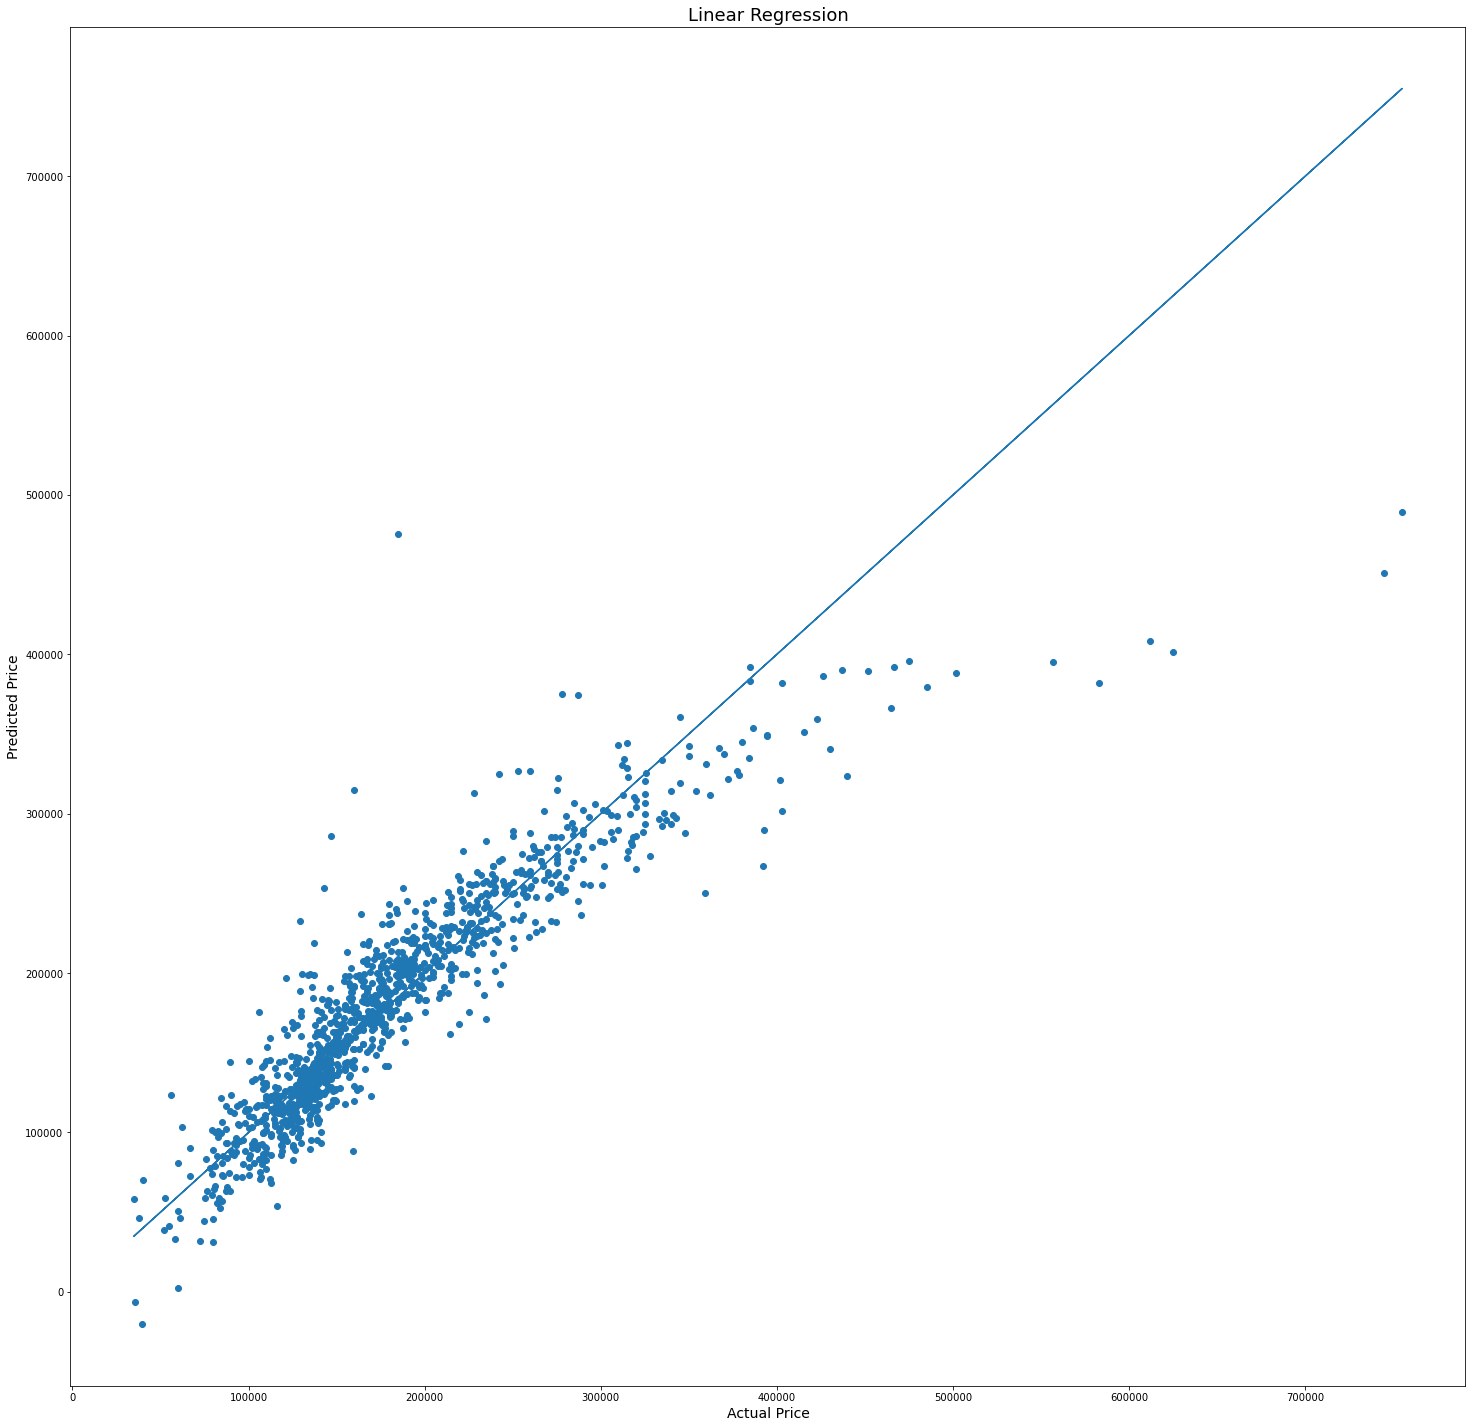

In [562]:
plt.figure(figsize=(25,25))
plt.scatter(x=y_train, y=pred_train)
plt.plot(y_train, y_train)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show

# 
Since the best fit line passes through maximum of the points, the model seems to be working well

# Regularization

In [563]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001, .001, .01,.1, 1, 10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [564]:
ls=Lasso(alpha=10, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train, y_train)
pred_ls=ls.predict(x_train)

lss=r2_score(y_train, pred_ls)
lss

0.8313907598460937

In [565]:
cv_score=cross_val_score(ls,x_train,y_train,cv=8)
cv_mean=cv_score.mean()
cv_mean

0.7793974448172889

# Using Random Forest Regressor Model

In [566]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'], 'max_features':["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [567]:
rf=RandomForestRegressor(criterion="mse", max_features="sqrt")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision=rf.predict(x_train)

rfs=r2_score(y_train,pred_decision)
print('R2 Score: ', rfs*100)

rfscore=cross_val_score(rf,x_train,y_train,cv=8)
rfc=rfscore.mean()
print("Cross Val Score:", rfc*100)

R2 Score:  97.90844501303036
Cross Val Score: 85.41556456525264


# Using Ada Boost Regressor Model

In [568]:
from sklearn.ensemble import AdaBoostRegressor
parameters={'n_estimators':np.arange(10,100), 'learning_rate':np.arange(0.01,0.1)}
ad=AdaBoostRegressor()
clf=GridSearchCV(ad,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'learning_rate': 0.01, 'n_estimators': 76}


In [569]:
ad=AdaBoostRegressor(n_estimators=76, learning_rate=0.01)
ad.fit(x_train, y_train)
ad.score(x_train, y_train)
pred_decision=ad.predict(x_train)

ads=r2_score(y_train,pred_decision)
print('R2 Score: ', ads*100)

adscore=cross_val_score(ad,x_train,y_train,cv=8)
adc=adscore.mean()
print("Cross Val Score:", adc*100)

R2 Score:  79.69514782612488
Cross Val Score: 73.73781280851995


# The R2 score of Random Forest Regressor 97.91% is and CV score of Random Forest Regressor is 85.41%. This is the best working model

In [570]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'], 'max_features':["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [571]:
rf=RandomForestRegressor(criterion="mae", max_features="sqrt")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision=rf.predict(x_train)

rfs=r2_score(y_train,pred_decision)
print('R2 Score: ', rfs*100)

rfscore=cross_val_score(rf,x_train,y_train,cv=8)
rfc=rfscore.mean()
print("Cross Val Score:", rfc*100)

R2 Score:  97.67525143234236
Cross Val Score: 85.43873292345376


In [572]:
#Using Random Forest Regressor on test data
pred_test=rf.predict(x_test)

In [574]:
print("The price of the property should be as follows :-")
pred_test

The price of the property should be as follows :-


array([327148.24 , 194598.   , 259422.52 , 180974.24 , 246922.57 ,
        84716.72 , 145022.69 , 337963.69 , 244822.75 , 180794.86 ,
        83359.87 , 160211.84 , 129967.41 , 184262.05 , 325893.96 ,
       123569.93 , 109397.5  , 127372.79 , 175719.12 , 194087.28 ,
       153680.88 , 158528.08 , 157147.41 , 107082.56 , 102646.87 ,
       130363.83 , 181002.64 , 149348.07 , 172396.75 , 120422.17 ,
       138923.7  , 194715.12 , 232301.4  , 164376.5  , 113940.1  ,
       179033.63 , 199194.5  , 115032.   , 157565.54 , 147214.22 ,
       109614.13 , 317172.135, 208366.53 , 182999.51 , 145482.25 ,
       136640.38 , 136999.58 , 112569.61 , 212630.34 , 342362.28 ,
       147307.87 , 221975.17 , 105231.32 , 104862.41 , 288557.54 ,
       131224.86 , 145694.63 , 184887.6  , 128998.72 , 255893.46 ,
       106440.92 , 180985.74 , 139087.54 , 148704.37 , 206781.36 ,
       101819.59 , 156433.5  , 203109.89 , 137151.75 , 166898.48 ,
       285489.41 , 177018.5  , 177318.   , 162938.54 , 145765.